In [8]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [59]:
def wiener_process(T, N):
    """
    T: total time
    N: The total number of steps
    """
    W0 = 0
    dt = T/float(N)
    # simulate the increments by normal random variable generator
    increments = np.random.normal(0, 1*np.sqrt(dt), steps)
    W = [0] + list(np.cumsum(increments))
    return W

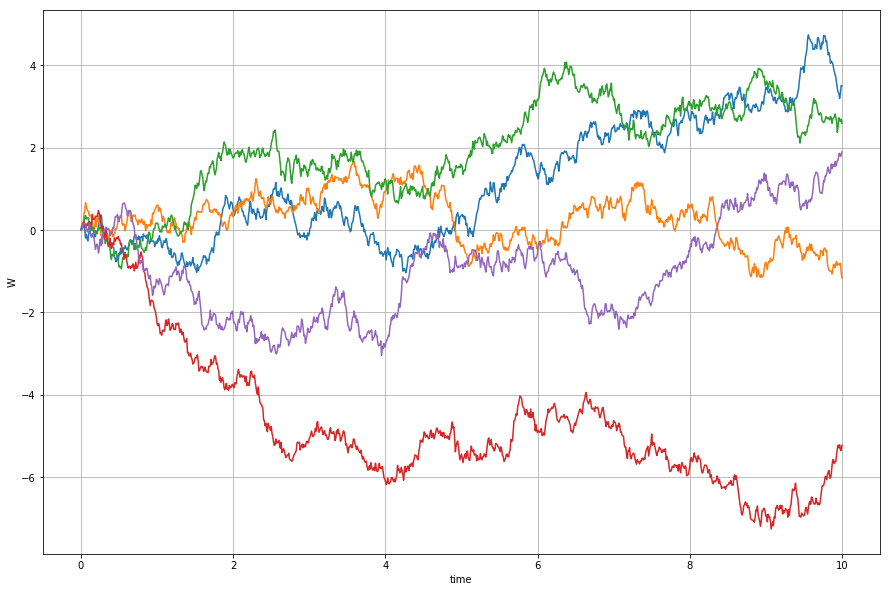

In [60]:
t = np.linspace(0.0, N*dt, N+1)
plt.figure(figsize=(15,10))
for i in range(5):
    W = wiener_process(10, 1000)
    plt.plot(t, W)
    plt.xlabel('time')
    plt.ylabel('W')
    plt.grid(True)

In [203]:
import quandl
quandl.ApiConfig.api_key = 'NxTUTAQswbKs5ybBbwfK'
data = quandl.get('WIKI/GOOG')

In [236]:
close = data['2015-01':'2017-07']['Adj. Close']
annual_return = (close[-1]/close[1])** (365.0/len(close)) - 1
annual_vol = (close/close.shift(1)-1)[1:].std()*np.sqrt(252)
s0

930.5

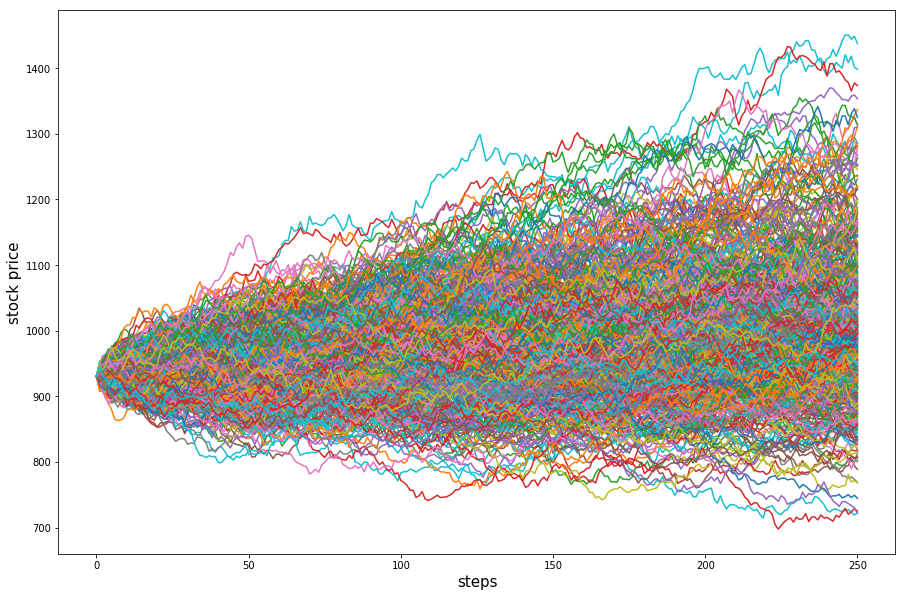

In [234]:
mu = annual_return
sigma = annual_vol
s0 = close[-1]
T = 3.0/12 
delta_t = 0.001
num_reps = 500
steps = T/delta_t
plt.figure(figsize=(15,10))
for j in range(num_reps):
    price_path = [s0]
    st = s0
    for i in range(int(steps)):
        st = st*e**((mu-0.5*sigma**2)*delta_t + sigma*np.sqrt(delta_t)*np.random.normal(0, 1))
        price_path.append(st)
    plt.plot(price_path)
plt.ylabel('stock price',fontsize=15)
plt.xlabel('steps',fontsize=15)

In [255]:
def mc_euro_options(option_type,s0,strike,maturity,r,sigma,num_reps):
    payoff_sum = 0
    for j in range(num_reps):
        st = s0
        st = st*e**((r-0.5*sigma**2)*maturity + sigma*np.sqrt(maturity)*np.random.normal(0, 1))
        if option_type == 'c':
            payoff = max(0,st-strike)
        elif option_type == 'p':
            payoff = max(0,strike-st)
        payoff_sum += payoff
    premium = (payoff_sum/float(num_reps))*(e**(-r*maturity))
    return premium     

In [256]:
mc_euro_options('c',927.96,785,100.0/252,0.01,0.23,10000)

151.57654346653473